In [243]:
import random
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Log Loss

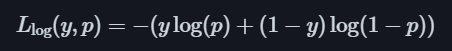

In [249]:
class myNN:
    def __init__(self):
        #On travaille sur un simple réseau de noronne 2 inputs et 1 output (logistique régression)
        #y = w1*x1 + w2*x2 + bias avec fonction d'activation sigmoid
        self.w1 = 1
        self.w2 = 1
        self.bias = 0
        self.learning_rate = 0.1
        self.StopLoss = 1e-7 #On arrete lorque l'erreur ne change pas beaucoup càd on peut pas minimiser plus

    def fit(self, X, y, epochs):
        weighted_sum = self.w1 * X[:, 0] + self.w2 * X[:, 1] + self.bias
        y_pred = self.sigmoid(weighted_sum)
        loss_init = self.log_loss(y, y_pred)
        
        for epoch in range(epochs):
            weighted_sum = self.w1 * X[:, 0] + self.w2 * X[:, 1] + self.bias
            y_pred = self.sigmoid(weighted_sum)

            loss = self.log_loss(y, y_pred)
            
            d_w1 = 1/len(X[:, 0]) * np.dot(X[:, 0], y_pred - y) #derivé partiel de l'erreur par rapport à w1
            d_w2 = 1/len(X[:, 0]) * np.dot(X[:, 1], y_pred - y) #derivé partiel de l'erreur par rapport à w2
            d_bias = np.mean(y_pred - y) #derivé partiel de l'erreur par rapport à bias
            
            self.w1 = self.w1 - self.learning_rate * d_w1
            self.w2 = self.w2 - self.learning_rate * d_w2
            self.bias = self.bias - self.learning_rate * d_bias

            if epoch % 50 == 0:
                print(f'epoch: {epoch}, w1: {self.w1}, w2: {self.w2}, bias: {self.bias}, Loss: {loss} ')
            
            if epoch > 0 and abs(loss - loss_init) <= self.StopLoss:
                break

            loss_init = loss

    def predict(self, X_test):
        return self.sigmoid(self.w1 * X_test[:, 0] + self.w2 * X_test[:, 1] + self.bias)

    
    def sigmoid(self, X):
        return 1 / (1 + np.exp(-X))

    def log_loss(self, y_true, y_pred):
        epsilon = 1e-15
        y_pred_new = [np.maximum(i, epsilon) for i in y_pred]
        y_pred_new = [np.minimum(i, 1 - epsilon) for i in y_pred_new]
        y_pred_new = np.array(y_pred_new)
        return -np.mean(y_true * np.log(y_pred_new) + (1 - y_true) * np.log(1 - y_pred_new))
        

In [90]:
df = pd.read_csv('insurance_data.csv')
df.head()

,age,affordibility,bought_insurance
0,22,1,0
1,25,0,0
2,47,1,1
3,52,0,0
4,46,1,1


In [224]:
X_train, X_test, y_train, y_test = train_test_split(df[['age', 'affordibility']], df['bought_insurance'], test_size=0.20, random_state=20)

In [225]:
X_train, X_test, y_train, y_test = X_train.to_numpy(), X_test.to_numpy(), y_train.to_numpy(), y_test.to_numpy()

In [226]:
#Normalisation des données entre 0 et 1
X_train = X_train.astype(float)
X_test = X_test.astype(float)
X_train[:, 0] = X_train[:, 0] / 100
X_test[:, 0] = X_test[:, 0] / 100

In [238]:
X_train

array([[0.19, 0.  ],
       [0.54, 1.  ],
       [0.45, 1.  ],
       [0.4 , 1.  ],
       [0.26, 0.  ],
       [0.56, 1.  ],
       [0.5 , 1.  ],
       [0.18, 1.  ],
       [0.49, 1.  ],
       [0.58, 1.  ],
       [0.55, 0.  ],
       [0.25, 0.  ],
       [0.62, 1.  ],
       [0.22, 1.  ],
       [0.47, 1.  ],
       [0.6 , 0.  ],
       [0.28, 1.  ],
       [0.21, 1.  ],
       [0.61, 1.  ],
       [0.55, 1.  ],
       [0.23, 1.  ],
       [0.52, 0.  ]])

In [239]:
model = myNN()
model.fit(X_train, y_train, epochs=5000)

epoch: 0, w1: 0.9979808926255348, w2: 0.9913881183885069, bias: -0.01579874558595535, Loss: 0.645879853336323 
epoch: 50, w1: 1.0415807896212566, w2: 0.8202759784736082, bias: -0.45457279830486724, Loss: 0.5903468814556047 
epoch: 100, w1: 1.1943003109797474, w2: 0.844726308984299, bias: -0.6220680311623032, Loss: 0.579640448514331 
epoch: 150, w1: 1.36197130006188, w2: 0.8919997062466722, bias: -0.7420895497246919, Loss: 0.5706725591273947 
epoch: 200, w1: 1.5298570561786033, w2: 0.9361848056816668, bias: -0.8498447769603379, Loss: 0.5623129311003685 
epoch: 250, w1: 1.6957869819467986, w2: 0.9747462316643901, bias: -0.9508287748061187, Loss: 0.5544611692723715 
epoch: 300, w1: 1.8593317092351653, w2: 1.0081739107306091, bias: -1.0463987728342519, Loss: 0.5470544140052351 
epoch: 350, w1: 2.0203286464060644, w2: 1.0372347230712875, bias: -1.1372624908577538, Loss: 0.5400439284231641 
epoch: 400, w1: 2.1786787235816027, w2: 1.062622667830562, bias: -1.2239617628407773, Loss: 0.53339104

In [242]:
df = pd.read_csv('insurance_data.csv')
df

,age,affordibility,bought_insurance
0,22,1,0
1,25,0,0
2,47,1,1
3,52,0,0
4,46,1,1
5,56,1,1
6,55,0,0
7,60,0,1
8,62,1,1
9,61,1,1


In [247]:
y_pred = model.predict(X_test)
y_pred = [0 if i <= 0.5 else 1 for i in y_pred]
y_pred

[0, 1, 0, 0, 1, 0]

In [241]:
X_test

array([[0.29, 0.  ],
       [0.46, 1.  ],
       [0.25, 0.  ],
       [0.18, 1.  ],
       [0.46, 1.  ],
       [0.27, 0.  ]])

In [235]:
y_test

array([0, 1, 0, 0, 0, 0])

In [248]:
accuracy_score(y_test, y_pred)

0.8333333333333334